# Cluster 

## Jerarquico

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

%matplotlib inline

In [4]:
Estudiantes=pd.read_csv("Ejemplo Estudiantes.csv")

In [5]:
Estudiantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Estudiante   10 non-null     object 
 1   Matematicas  10 non-null     float64
 2   Ciencias     10 non-null     float64
 3   Espanol      10 non-null     float64
 4   Historia     10 non-null     float64
 5   Deportes     10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 608.0+ bytes


In [6]:
Estudiantes.head()

,Estudiante,Matematicas,Ciencias,Espanol,Historia,Deportes
0,Lucia,7.0,6.5,9.2,8.6,8.0
1,Pedro,7.5,9.4,7.3,7.0,7.0
2,Ines,7.6,9.2,8.0,8.0,7.5
3,Luis,5.0,6.5,6.5,7.0,9.0
4,Andres,6.0,6.0,7.8,8.9,7.3


**Obtención de calificaciones para análisis**

In [15]:
Calificaciones=Estudiantes.iloc[:, [1,2,3,4]].values
Calificaciones

array([[7. , 6.5, 9.2, 8.6],
       [7.5, 9.4, 7.3, 7. ],
       [7.6, 9.2, 8. , 8. ],
       [5. , 6.5, 6.5, 7. ],
       [6. , 6. , 7.8, 8.9],
       [7.8, 9.6, 7.7, 8. ],
       [6.3, 6.4, 8.2, 9. ],
       [7.9, 9.7, 7.5, 8. ],
       [6. , 6. , 6.5, 5.5],
       [6.8, 7.2, 8.7, 9. ]])

**Dendrograma del Clustering Jerárquico**

In [16]:
Clustering_Jerarquico=linkage(Calificaciones, method='ward') #Utilizamos el método ward para agrupar los clusters

**Asignación de Clusters por estudiante**

In [17]:
clusters=fcluster(Clustering_Jerarquico, t=2, criterion="distance")# definimos la altura del dendrograma
clusters

array([3, 1, 1, 2, 3, 1, 3, 1, 2, 3], dtype=int32)

In [18]:
Estudiantes['Clustering jerarquico']=clusters
Estudiantes

,Estudiante,Matematicas,Ciencias,Espanol,Historia,Deportes,Clustering jerarquico
0,Lucia,7.0,6.5,9.2,8.6,8.0,3
1,Pedro,7.5,9.4,7.3,7.0,7.0,1
2,Ines,7.6,9.2,8.0,8.0,7.5,1
3,Luis,5.0,6.5,6.5,7.0,9.0,2
4,Andres,6.0,6.0,7.8,8.9,7.3,3
5,Ana,7.8,9.6,7.7,8.0,6.5,1
6,Carlos,6.3,6.4,8.2,9.0,7.2,3
7,Jose,7.9,9.7,7.5,8.0,6.0,1
8,Sonia,6.0,6.0,6.5,5.5,8.7,2
9,Maria,6.8,7.2,8.7,9.0,7.0,3


## Método de K-Means

In [19]:
from sklearn.cluster import KMeans

In [20]:
vinos=pd.read_csv("caracteristicas de vinos.csv")

In [21]:
vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [22]:
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
vinos_variables=vinos.drop(['Vino'], axis=1)

In [24]:
vinos_variables.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Normalización de datos**

In [25]:
vinos_norm=(vinos_variables-vinos_variables.min())/(vinos_variables.max()-vinos_variables.min())
vinos_norm

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


**Busqueda de cantidad óptima de clusters**

*Calculando que tan similares son los individuos dentro de los clusters*

In [27]:
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(vinos_norm) #Aplico K-Means a la base de datos
    wcss.append(kmeans.inertia_)

C:\Users\almac\anaconda3\envs\python_r\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


*Graficando los resultados de WCSS para formar el codo de Jambú*

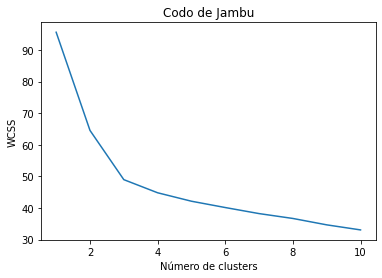

In [28]:
plt.plot(range(1,11), wcss)
plt.title("Codo de Jambu")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') #WCSS es el indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

**Aplicando el método k-means a la base de datos**

In [29]:
clustering=KMeans(n_clusters=3, max_iter=300) #Crea el modelo
clustering.fit(vinos_norm) #Aplica el modelo a la base de datos

KMeans(n_clusters=3)

**Agregando la clasificación al archivo original**

In [30]:
vinos['KMeans_Clusters']= clustering.labels_ #Los resultados del clustering se guargan en labels dentro del modelo
vinos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


**Visualización de clusters que se forman**

*Aplicaremos el análisis de componentes principales para darnos una idea de como se formaron los clusters*

In [35]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_vinos=pca.fit_transform(vinos_norm)
pca_vinos_df=pd.DataFrame(data=pca_vinos, columns=['Componente_1', 'Componente_2'])
pca_nombres_vinos=pd.concat([pca_vinos_df,vinos[['KMeans_Clusters']]], axis=1)

pca_nombres_vinos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,1
1,-0.484977,-0.008823,1
2,-0.521172,-0.189187,1
3,-0.821644,-0.580906,1
4,-0.202546,-0.059467,1
...,...,...,...
173,0.739510,-0.471901,0
174,0.581781,-0.348366,0
175,0.626313,-0.546857,0
176,0.572991,-0.425516,0


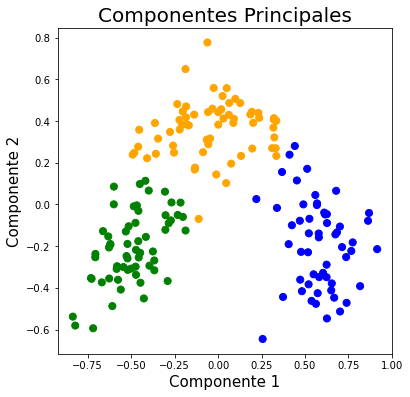

In [37]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(['blue', 'green', 'orange'])
ax.scatter(x=pca_nombres_vinos.Componente_1, y=pca_nombres_vinos.Componente_2,
          c=color_theme[pca_nombres_vinos.KMeans_Clusters], s=50)
plt.show()